# Country visualization test

### Installation
1. Create virtual environment from requirements.txt
2. Add kernel to jupyter notebook using *ipython kernel install --user --name=YOUR_VIRTUAL_ENV_NAME*

In [1]:
# Hidden depedency of geopandas: descartes
import geopandas as gpd
import matplotlib.pyplot as plt

## Datasets
Datasets are from [naturalearthdata](https://www.naturalearthdata.com/downloads/10m-cultural-vectors/) with public license, meaning they are free to use for everybody. For countries the dataset **Admin 0 – Countries** is used, for the populated places, the dtaaset **Populated Places** is used.

Data CRS is epsg:4326


,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,ADMIN,ADM0_A3,...,NAME_KO,NAME_NL,NAME_PL,NAME_PT,NAME_RU,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,geometry
0,Admin-0 country,1,3,Zimbabwe,ZWE,0,2,Sovereign country,Zimbabwe,ZWE,...,짐바브웨,Zimbabwe,Zimbabwe,Zimbábue,Зимбабве,Zimbabwe,Zimbabve,Zimbabwe,辛巴威,POLYGON ((31.28789062500002 -22.40205078125001...
1,Admin-0 country,1,3,Zambia,ZMB,0,2,Sovereign country,Zambia,ZMB,...,잠비아,Zambia,Zambia,Zâmbia,Замбия,Zambia,Zambiya,Zambia,赞比亚,"POLYGON ((30.39609375000001 -15.64306640625, 3..."
2,Admin-0 country,1,3,Yemen,YEM,0,2,Sovereign country,Yemen,YEM,...,예멘,Jemen,Jemen,Iémen,Йемен,Jemen,Yemen,Yemen,也门,"(POLYGON ((53.08564453125001 16.648388671875, ..."
3,Admin-0 country,3,2,Vietnam,VNM,0,2,Sovereign country,Vietnam,VNM,...,베트남,Vietnam,Wietnam,Vietname,Вьетнам,Vietnam,Vietnam,Việt Nam,越南,"(POLYGON ((104.06396484375 10.3908203125, 104...."


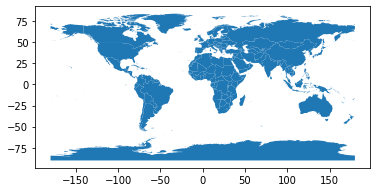

In [2]:
# read countries from shapefile and plot the all
all_countries = gpd.read_file('data/ne_50m_admin_0_countries/ne_50m_admin_0_countries.shp')
print(f'Data CRS is {all_countries.crs["init"]}')
all_countries.plot()
all_countries.head(4)

## Country visualization
The following visualizations show the country selected in the variable *country_name* below. To see all available countries, check the ADMIN column of the *all_countries* dataframe.

In [17]:
country_name = 'France'
show_largest_area_only = True

In [18]:
# Extract country from dataset and replace geometry column 
# with largest polygon only if show_largest_area_only is set.
country_4326 = all_countries[all_countries['ADMIN'] == country_name].copy()
if show_largest_area_only:
    try:
        max_area = 0
        for multipoly in country_4326.geometry:
            for poly in multipoly:
                if poly.area > max_area:
                    largest_poly = poly
                    max_area = poly.area
        country_4326['geometry'] = largest_poly
    except TypeError:
        pass

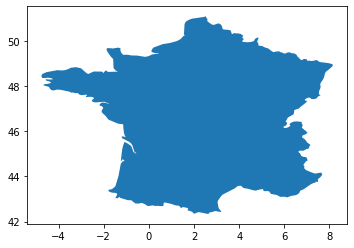

In [19]:
# default plot
country_4326.plot()

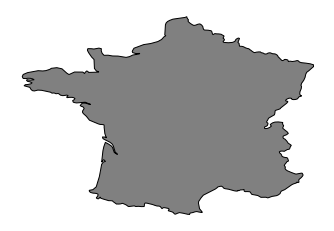

In [20]:
# Plot with custom styles
fig, ax = plt.subplots()
plt.axis('off')
country_4326.plot(ax=ax, color='grey', edgecolor='black')

In [21]:
# Reproject data into pseudomercator (3857)
country_3857 = country_4326.to_crs(epsg=3857)
ax.set_axis_off()
country_3857.plot(ax=ax, color='grey', edgecolor='black')

<Figure size 432x288 with 0 Axes>

## Point overlay
The dataset **Populated places** contains a wealth of information about the most populated places worldwide. The dataset also consists of a geometry column holding a point feature for each place. In the following, the data is aggregated to show the top 5 most populated places for the selected country.

In [22]:
# Data preparation: Select the 5 most populated places within country_name.
pop_places = gpd.read_file('data/ne_10m_populated_places/ne_10m_populated_places.shp')
country_megacities_top5_4326 = pop_places[(pop_places['ADM0NAME']==country_name)].sort_values(by=['POP_MAX'], ascending=False).head(5)
country_megacities_top5_3857 = country_megacities_top5_4326.to_crs(epsg=3857)
country_megacities_top5_3857

,SCALERANK,NATSCALE,LABELRANK,FEATURECLA,NAME,NAMEPAR,NAMEALT,DIFFASCII,NAMEASCII,ADM0CAP,...,name_ja,name_ko,name_nl,name_pl,name_sv,name_tr,name_vi,wdid_score,ne_id,geometry
7281,0,600,3,Admin-0 capital,Paris,None,None,0,Paris,1.0,...,パリ,파리,Parijs,Paryż,Paris,Paris,Paris,4,1159151613,POINT (259529.088321752 6252601.467208495)
6940,3,110,3,Admin-1 region capital,Lyon,None,None,0,Lyon,0.0,...,リヨン,리옹,Lyon,Lyon,Lyon,Lyon,Lyon,4,1159150845,POINT (537459.9210579005 5743879.764532968)
6581,4,50,3,Admin-1 region capital,Marseille,None,Marseille-Aix-en-Provence,0,Marseille,0.0,...,マルセイユ,마르세유,Marseille,Marsylia,Marseille,Marsilya,Marseille,4,1159150037,POINT (598126.7787396346 5356511.883342922)
5332,6,30,3,Admin-1 region capital,Lille,None,None,0,Lille,0.0,...,リール,릴,Rijsel,Lille,Lille,Lille,Lille,4,1159147227,POINT (342648.3208879682 6559950.950390219)
5329,6,30,3,Populated place,Nice,None,Nice-Cannes,0,Nice,0.0,...,ニース,니스,Nice,Nicea,Nice,Nice,Nice,4,1159147221,POINT (808522.1564043373 5421745.610582698)


In [24]:
country_megacities_top5_4326["geometry"]

7281     POINT (2.33138946713035 48.86863878981461)
6940     POINT (4.828084616879835 45.7719544229401)
6581     POINT (5.37306427182989 43.29192492260455)
5332    POINT (3.078062237315521 50.65191495355856)
5329    POINT (7.263078106472904 43.71696357820531)
Name: geometry, dtype: object

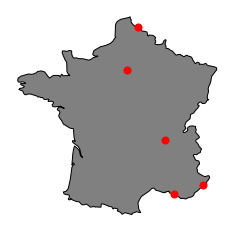

In [25]:
# Overlay with static attributes
fig, ax = plt.subplots()
ax.set_axis_off()
country_3857.plot(ax=ax, color='grey', edgecolor='black')
country_megacities_top5_3857.plot(ax=ax, marker='o', color='red', markersize=50)

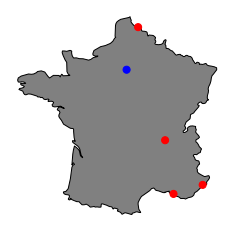

In [121]:
# Overlay with different colors based on a simple list, whereby the first entry is blue, the rest in red.
colors = ['b', 'r', 'r', 'r', 'r']

fig, ax = plt.subplots()
ax.set_axis_off()
country_3857.plot(ax=ax, color='grey', edgecolor='black')
gpd.plotting.plot_point_collection(ax, country_megacities_top5_3857['geometry'], color=colors, markersize=50)

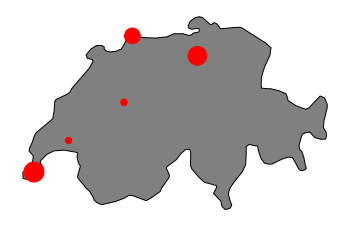

In [11]:
# Overlay with different markersizes corresponding to the population sizes.
def get_markersizes(dataseries, min_markersize, max_markersize):
    min_data = dataseries.min()
    max_data = dataseries.max()
    return [(v - min_data) / (max_data - min_data) * (max_markersize - min_markersize) + min_markersize for v in dataseries]

markersizes = get_markersizes(country_megacities_top5_3857['POP_MAX'], 40, 400)

fig, ax = plt.subplots()
ax.set_axis_off()
country_3857.plot(ax=ax, color='grey', edgecolor='black')
gpd.plotting.plot_point_collection(ax, country_megacities_top5_3857['geometry'], color='red', markersize=markersizes)

TypeError: __init__() got an unexpected keyword argument 'geometry'

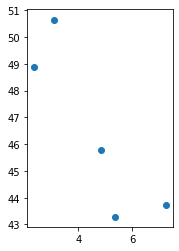

In [35]:
gpd.GeoSeries(gpd.points_from_xy(lats, lons), crs=4326).plot()

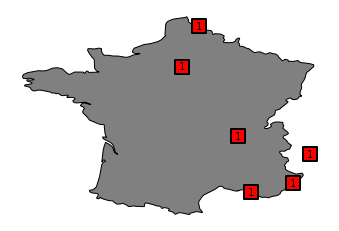

In [115]:
lats = [2.33138946713035, 4.828084616879835, 5.37306427182989, 3.078062237315521, 8.0, 7.263078106472904,]
lons = [48.86863878981461, 45.7719544229401, 43.29192492260455, 50.65191495355856, 45.0, 43.71696357820531,]
locations_4326 = gpd.GeoSeries(gpd.points_from_xy(lats, lons), crs=4326)

fig, ax = plt.subplots()
ax.set_axis_off()
country_4326.plot(ax=ax, color='grey', edgecolor='black')
locations_4326.plot(ax=ax, marker='s', color='red', markersize=200, edgecolor='black', linewidth='2')
for xy in [(x, y) for x, y in zip(lats, lons)]:
    ax.annotate(1, xy=xy, ha="center", va="center", color="black")
plt.show()

In [116]:
is_location_in_country_part = locations_4326.intersects(country_4326["geometry"].iloc[0])

In [117]:
locations_in_country_part = locations_4326[locations_4326.intersects(country_4326["geometry"].iloc[0])]

In [120]:
list(locations_in_country_part.index)

[0, 1, 2, 3, 5]

In [119]:
is_location_in_country_part

0     True
1     True
2     True
3     True
4    False
5     True
dtype: bool

In [107]:
[(location.x, location.y) for location in locations_in_country_part]

[(2.33138946713035, 48.86863878981461),
 (4.828084616879835, 45.7719544229401),
 (5.37306427182989, 43.29192492260455),
 (3.078062237315521, 50.65191495355856),
 (7.263078106472904, 43.71696357820531)]

In [72]:
for xy in [(x, y) for x, y in zip(lats, lons)]:
    ax.annotate("a", xy=xy)

In [67]:
[(x, y) for x, y in zip(lats, lons)]

[(2.33138946713035, 48.86863878981461),
 (4.828084616879835, 45.7719544229401),
 (5.37306427182989, 43.29192492260455),
 (3.078062237315521, 50.65191495355856),
 (7.263078106472904, 43.71696357820531),
 (8.0, 45.0)]